# Projeto 1 - Ciência dos Dados.

Nome: Pedro Braga Carani

# Introdução 

## Mercosul
O mercosul é uma organizacao internacional criada em 1991 com o objetivo de obter uma integração econômica e aduaneira, a organização é constituída por Argentina, Brasil, Paraguai e Uruguai.
Consolidada em várias partes do mundo, uma nova tendencia de integração está surgindo, a **integração energética**. 

# Pergunta 

## A entrada de um país ao Mercosul fará com que sua produção de energia hidrelétrica aumente?

# Hipotése

### A integração energética após a criação do Mercosul aumentará.

Sabendo que a demanda da energia elétrica está crescendo cada dia mais e que a integração energética é um dos objetivos da organizacão, o **Mercosul está se tornando um "polo energético".**
Um possível exemplo desse funcionamento são as hidreletricas binacionais, como a de Itaipu (Brasil e Paraguai), Yachieta (Argentina e Paraguai) e Salto Grande (Argentina e Uruguai).


# Mecanismo

O mecanismo utilizado é analisar os dados da geração de energia hidrelétrica dos países que pertecem ao Mercosul antes e depois da criação da organização. Além de comparar com países que não estão no Mercosul. 

Os dados utilizados são: 
- produção de energia hidrelétrica total
- gdp/capita


#### Importar as bibliotecas

In [2]:

import pandas as pd
import matplotlib.pyplot as plt


#### Abrir o arquivo de dados

In [3]:
dados = pd.read_excel('hydro_power_generation_total.xlsx')
gdp = pd.read_excel('income_per_person_gdppercapita_ppp_inflation_adjusted.xlsx')

#### Arrumar o banco de dados


In [4]:
#arrumar os dados
dados_country=dados.set_index('country')
dados_country_t=dados_country.transpose()
gdp_country=gdp.set_index('country')
gdp_country_t=gdp_country.transpose()


#### Filtrar pelos países que pertecem ao MERCOSUL antes e depois da criação da organização.

In [5]:
antes_mercosul=dados_country_t[(dados_country_t.index>=1971)&(dados_country_t.index<=1991)][['Brazil','Paraguay','Argentina','Uruguay']]
mercosul=dados_country_t[(dados_country_t.index>=1991)&(dados_country_t.index<=2010)][['Brazil','Paraguay','Argentina','Uruguay']]
antes_mercosul_gdp=gdp_country_t[(gdp_country_t.index>=1971)&(gdp_country_t.index<=1991)][['Brazil','Paraguay','Argentina','Uruguay']]
mercosul_gdp=gdp_country_t[(gdp_country_t.index>=1991)&(gdp_country_t.index<=2010)][['Brazil','Paraguay','Argentina','Uruguay']]



#### Filtrar pelos países que são a base para comparação. 

In [6]:
base_antes_mercosul=dados_country_t[(dados_country_t.index>=1971)&(dados_country_t.index<=1991)][['Chile', 'United States', 'Mexico']]
base=dados_country_t[(dados_country_t.index>=1991)&(dados_country_t.index<=2010)][['Chile','United States', 'Mexico']]
base_antes_mercosul_gdp=gdp_country_t[(gdp_country_t.index>=1971)&(gdp_country_t.index<=1991)][['Chile', 'United States', 'Mexico']]
base_gdp=dados_country_t[(dados_country_t.index>=1991)&(dados_country_t.index<=2010)][['Chile','United States', 'Mexico']]

#### Join dos dados antes do mercosul


In [7]:
antes_mercosul_energy_gdp=antes_mercosul.join(antes_mercosul_gdp, lsuffix='_energy', rsuffix='_gdp')

#### Join dos dados depois do mercosul 

In [8]:
mercosul_energy_gdp=mercosul.join(mercosul_gdp, lsuffix='_energy', rsuffix='_gdp')

#### Join dos dados dos países que são bases para comparação

In [9]:
base_antes_energy_gdp=base_antes_mercosul.join(base_antes_mercosul_gdp, lsuffix='_energy', rsuffix='_gdp')
base_energy_gdp=base.join(base_gdp, lsuffix='_energy', rsuffix='_gdp')


In [10]:
mercosul_energy_gdp


country,Brazil_energy,Paraguay_energy,Argentina_energy,Uruguay_energy,Brazil_gdp,Paraguay_gdp,Argentina_gdp,Uruguay_gdp
1991,18700000.0,2520000.0,1400000.0,526000.0,10300,6090,12000,10100
1992,19200000.0,2330000.0,1670000.0,681000.0,10100,6040,13300,10800
1993,20200000.0,2700000.0,2050000.0,628000.0,10400,6190,13900,11000
1994,20900000.0,3130000.0,2350000.0,642000.0,10800,6360,14500,11800
1995,21800000.0,3620000.0,2310000.0,504000.0,11100,6640,13900,11500
1996,22900000.0,3850000.0,1970000.0,496000.0,11100,6590,14500,12100
1997,24000000.0,4370000.0,2410000.0,558000.0,11300,6720,15500,13000
1998,25100000.0,4370000.0,2270000.0,787000.0,11200,6580,15900,13500
1999,25200000.0,4460000.0,1840000.0,473000.0,11100,6360,15200,13200
2000,26200000.0,4600000.0,2470000.0,606000.0,11400,6090,14900,12900


## Boxplot dos países do Mercosul (produção de energia hidroelétrica)

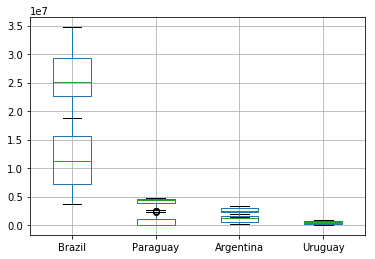

In [11]:
antes_mercosul.boxplot();
mercosul.boxplot();

É observar através dos boxplots, que houve um crescimento na produção de energia hidroelétrica principalmente no Brasil, o que pode ser explicado pelo crescimento das usinas hidrelétricas.


## Boxplot dos países bases para comparação (produção de energia hidroelétrica)

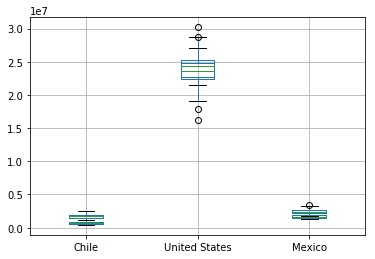

In [12]:
base_antes_mercosul.boxplot();
base.boxplot();

Nesse caso é possível observar que, mesmo com o crescimento, quando comparado com os países do Mercosul o crescimento foi bem inferior, o que demostra que a hipótese que o Mercosul favorece o aumento da produção de energia hidroelétrica, pode ser válida.

## Histograma com os dados da GDP no Brasil

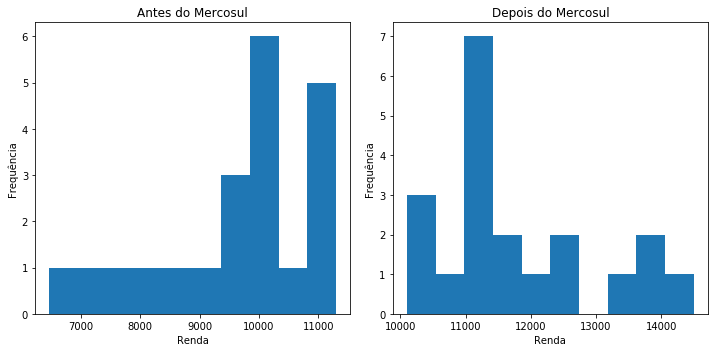

In [13]:
Brazil_antes_mercosul=antes_mercosul_energy_gdp.loc[:,'Brazil_gdp']
Brazil_mercosul=mercosul_energy_gdp.loc[:, 'Brazil_gdp']

fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = Brazil_antes_mercosul.plot.hist(title='Antes do Mercosul')
plt.ylabel('Frequência')
plt.xlabel('Renda')

plt.subplot(132)
plot = Brazil_mercosul.plot.hist(title='Depois do Mercosul')
plt.ylabel('Frequência')
plt.xlabel('Renda')



plt.tight_layout()
plt.show()


# Conclusão


   Com isso a conclusão é que houve uma integração energética maior nos paises integrantes do Mercosul, principalmente no Brasil e no Paraguai, muito devido a Usina de Itaipu. Além da integração energética, é possível observar, que há uma integração econômica também, o que faz com que o Mercosul seja uma organização forte nesses sentidos.
   Um dos fatos importantes que deve ser considerado, é que o objetivo dos países membros do Mercosul é ampliar o uso de energias renováveis, isso favorece ainda mais a integraçao dos membros.



## Referências


#### http://www.bracier.org.br/site/noticias/brasil/772-integracao-energetica-no-mercosul.html
#### https://www.gapminder.org/data/
#### https://economia.estadao.com.br/noticias/geral,integracao-energetica-no-mercosul-imp-,684334